In [109]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import os
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import PyPDF2
from PyPDF2 import PdfReader

In [110]:
technology_category_words = ['tecnología', 'whatsapp', 'facebook']
economy_category_words = ['economía','dólar']

In [111]:
document1 = open('files/Documento 1.pdf', 'rb')
document1 = PyPDF2.PdfReader(document1)

In [112]:
def tokenize_pdf_documents(document: PdfReader) -> list:
    text = ''

    for i in range(len(document.pages)):
        page = document.pages[i]
        text += page.extract_text()

    words = word_tokenize(text, 'spanish')
    tokens = [word.lower() for word in words if word.isalpha()]

    return tokens


def remove_stop_words(tokens: list):
    clean_tokens = tokens[:]

    for token in tokens:
        if token in stopwords.words('spanish'):
            clean_tokens.remove(token)

    return clean_tokens


def lem_tokens(tokens: list):
    nlp = spacy.load('es_core_news_sm')

    clean_tokens_lem_es = []

    for token in nlp(' '.join(tokens)):
        clean_tokens_lem_es.append(token.lemma_)

    return list(clean_tokens_lem_es)

In [113]:
document1_tokens = tokenize_pdf_documents(document1)
document1_tokens = remove_stop_words(document1_tokens)
document1_tokens = lem_tokens(document1_tokens)

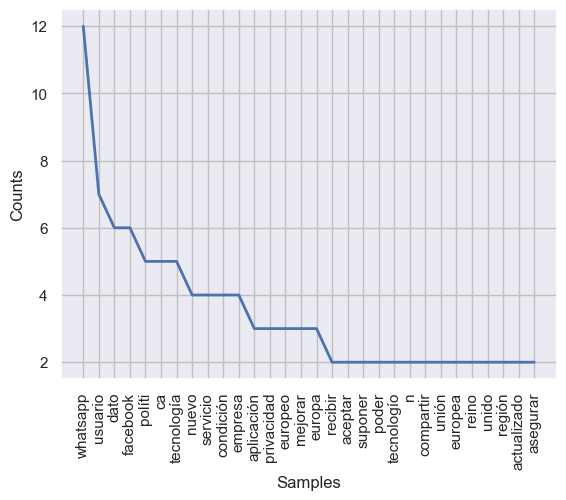

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [114]:
sns.set()

freq = nltk.FreqDist(document1_tokens)
freq.plot(30, cumulative=False)

In [115]:
directory = os.listdir('files')
directory = list(filter(lambda x: '.pdf' in x, directory))

for file in directory:
    document = open(f'files/{file}', 'rb')
    document = PyPDF2.PdfReader(document)

    tokens = tokenize_pdf_documents(document)
    clean_tokens = remove_stop_words(tokens)
    clean_tokens_lem = lem_tokens(clean_tokens)

    words_count = Counter(clean_tokens_lem)
    most_frequent_words = words_count.most_common(3)
    document_category = 'Others'

    for word_count in most_frequent_words:
        word, count = word_count

        if word in technology_category_words:
            document_category = 'technology'
            break

        if word in economy_category_words:
            document_category = 'economy'
            break

    print(f'document {file} with most frequent words: {str(most_frequent_words)}, is from {document_category} category')



document Documento 1.pdf with most frequent words: [('whatsapp', 12), ('usuario', 7), ('dato', 6)], is from technology category
document Documento 2.pdf with most frequent words: [('nuevo', 7), ('economía', 6), ('dólar', 5)], is from economy category
document Documento 3.pdf with most frequent words: [('educativo', 5), ('plataforma', 4), ('tecnología', 4)], is from technology category
document Documento 4.pdf with most frequent words: [('comunidad', 3), ('madrid', 3), ('tras', 2)], is from Others category
document spark_intro.pdf with most frequent words: [('spark', 80), ('dato', 55), ('poder', 52)], is from Others category
